# 运动控制系统

第六章，基于交流稳态模型的计算，答案参考[docin](https://www.docin.com/p-2351483631.html)

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
#铭牌数据,定子绕组Y联结
U_N=380;n_N=960;f_N=50
#实验测得数据
R_s=0.35;L_ls=0.006;L_m=0.26
#转子数据，已经折合到定子侧
R_r2=0.5;L_lr2=0.007
#磁通计算相关数据来源6-3
N_s=125;k_Ns=0.92

# 6-1 机械特性计算

根据同步转速计算公式$n_0=\frac{60f_1}{n_p}$以及同步转速与额定转速很接近可知：

In [2]:
#供电电源频率🔌
f_1=f_N;omega_1=2*math.pi*f_1
#电动机极对数
n_p=3
#同步转速
n_1=60*f_1/n_p
s_N=(n_1-n_N)/n_1
print('额定转差率为',s_N)
#简化电路的总电抗
Z=(R_s+R_r2/s_N)+1j*omega_1*(L_ls+L_lr2)
#额定定子相电流电压
Us=U_N/math.sqrt(3)
I_1N=Us/abs(Z)
#额定电磁转矩
Te=3*n_p/omega_1*I_1N**2*R_r2/s_N
#理想空载时的励磁电流为
I0=Us/abs(R_s+1j*omega_1*(L_ls+L_m))
print("额定工作下，定子电流为%.2fA，额定电磁转矩为%g\n理想空载时励磁电流为%.2fA" % (I_1N,Te,I0))

额定转差率为 0.04
额定工作下，定子电流为16.27A，额定电磁转矩为94.809
理想空载时励磁电流为2.63A


In [3]:
# 绘制机械特性曲线
s_m=R_r2/abs(R_s+1j*omega_1*(L_ls+L_lr2))
T_em=3*n_p*Us**2/(2*omega_1*(R_s+abs(R_s+1j*omega_1*(L_lr2+L_ls))))
print("s_m=%.2f;T_em=%.2f" % (s_m,T_em))


s_m=0.12;T_em=154.97


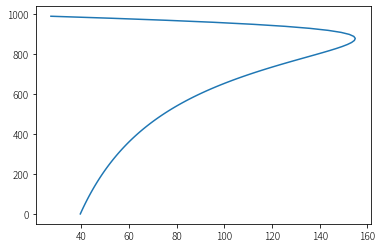

In [4]:
n=np.linspace(0,n_1,100);n=n[:-1]
s=(n_1-n)/n_1
num=3*n_p*Us**2*R_r2*s
den=omega_1*((s*R_s+R_r2)**2+(s*omega_1*(L_ls+L_lr2))**2)
Te=num/den
plt.plot(Te,n)
plt.show()

# 6-2 降压调速

Us=219.39 s_m=0.12 T_em=154.97 phi_m=0.008594
Us=146.26 s_m=0.12 T_em=68.87 phi_m=0.005729
Us=109.70 s_m=0.12 T_em=38.74 phi_m=0.004297


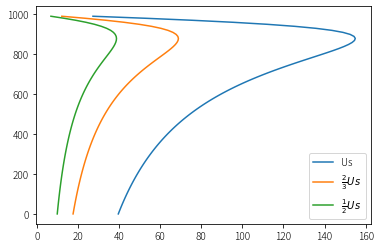

In [5]:
for Us2 in [Us,2/3*Us,Us/2]:
    # 绘制机械特性曲线
    s_m=R_r2/abs(R_s+1j*omega_1*(L_ls+L_lr2))
    T_em=3*n_p*Us2**2/(2*omega_1*(R_s+abs(R_s+1j*omega_1*(L_lr2+L_ls))))
    phi_m=Us2/(4.44*f_1*N_s*k_Ns)
    print("Us=%.2f s_m=%.2f T_em=%.2f phi_m=%2f" % (Us2,s_m,T_em,phi_m))
    n=np.linspace(0,n_1,100);n=n[:-1]
    s=(n_1-n)/n_1
    num=3*n_p*Us2**2*R_r2*s
    den=omega_1*((s*R_s+R_r2)**2+(s*omega_1*(L_ls+L_lr2))**2)
    Te=num/den
    plt.plot(Te,n)
plt.legend(['Us',r"$\frac{2}{3}Us$",r'$\frac{1}{2}Us$'])
plt.show()


# 6-3 定子相电流与每相中异步电动势的关系

In [6]:
dot_I_1N=Us/(R_s+R_r2/s_N+1j*omega_1*(L_ls+L_lr2))
dot_Eg=Us-(R_s+1j*omega_1*L_ls)*dot_I_1N
Eg=abs(dot_Eg)
phi=Eg/(4.44*f_1*N_s*k_Ns)
print(dot_I_1N,dot_Eg,Eg,phi)


(15.50697641527289-4.928527948738907j) (204.6756042286502-27.504977129308283j) 206.51543945489118 0.008089128063254647


# 6-6 低频补偿



In [7]:
#原低频特性
f1=lambda f:(f/50)
Us3=f1(5)*Us
T_em1=3*n_p*Us3**2/(2*omega_1*(R_s+abs(R_s+1j*omega_1*(L_lr2+L_ls))))
#补偿后
f2=lambda f:(0.9/50*f+0.1)
Us4=f2(5)*Us
T_em2=3*n_p*Us4**2/(2*omega_1*(R_s+abs(R_s+1j*omega_1*(L_lr2+L_ls))))
print("补偿前Us=%.2f T_em=%.2f" % (Us3,T_em1))
print("补偿后Us=%.2f T_em=%.2f" % (Us4,T_em2))

补偿前Us=21.94 T_em=1.55
补偿后Us=41.68 T_em=5.59


# 6-15

In [8]:
omega_sm=R_r2/L_lr2
omega_smax=0.9*omega_sm
Ismax=Eg/omega_1/math.sqrt((R_r2**2/omega_smax)**2+L_lr2**2)
print(omega_sm,Ismax)

71.42857142857143 82.09074365269925
